Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Villamor, Kurt Russel
**Section** | CPE32S3
**Date Performed**: | 02-21-25
**Date Submitted**: | 02-21-25
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

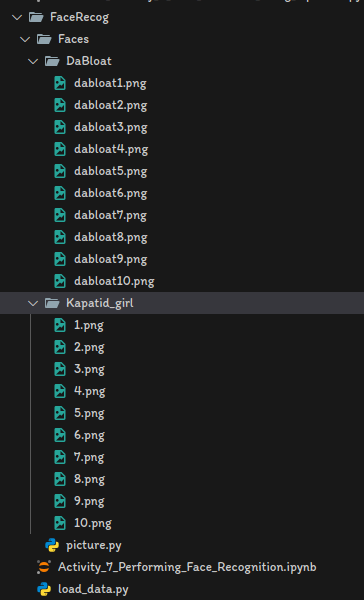

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [2]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [8]:
read_images('Faces')


[[array([[251, 255, 254, ...,  89,  97, 103],
         [252, 253, 254, ...,  71,  70,  74],
         [254, 254, 253, ...,  61,  64,  64],
         ...,
         [254, 254, 254, ...,  16,  16,  16],
         [254, 254, 254, ...,  16,  15,  15],
         [254, 254, 254, ...,  15,  13,  15]], dtype=uint8),
  array([[253, 254, 254, ..., 100,  97,  92],
         [253, 253, 254, ...,  79,  76,  82],
         [252, 252, 254, ...,  59,  59,  65],
         ...,
         [254, 254, 254, ...,  18,  18,  18],
         [254, 254, 254, ...,  18,  17,  17],
         [254, 254, 254, ...,  18,  16,  16]], dtype=uint8),
  array([[253, 254, 254, ...,  80,  95,  99],
         [253, 253, 254, ...,  62,  66,  79],
         [254, 254, 254, ...,  55,  57,  61],
         ...,
         [254, 254, 254, ...,  22,  21,  19],
         [254, 254, 254, ...,  21,  18,  17],
         [254, 254, 254, ...,  19,  17,  17]], dtype=uint8),
  array([[255, 255, 254, ..., 118, 119, 110],
         [255, 255, 254, ...,  79,  81,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

- The code opens the directory that is specified as a parameter. With this, the in finds all the subdirectories in it and list all of the of the image data by its array form which is the output from reading the image using imread()

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [9]:
def face_rec():
  names = ['DaBloat', 'DaSister'] # Put your names here for faces to recognize

  [X, y] = read_images('Faces')
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

- The First part of this snippet code, it trains the Eigenface model that is trained using the output of the read_images function before. Most of the problems to this code is the utilization os sys.argv, instead I explicitly specify the whole directory where the image files resides in.

## Eigenface Test
![EigenFaceTest.png](EigenFaceTest.png)

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

## Fisher Test

![FisherFaceTest.png](FisherFaceTest.png)

## LBPH Test
![FisherFaceTest.png](lbh.png)

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

- this array consist of the label and confidence. This is the labels we see in the output frame. With this we can identify the picture with label and confidence level more clearly.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

NOTE: This is done locally in my own machine

In [11]:
!pfetch

       /\
      /  \
     /\   \
    /      \
   /   ,,   \
  /   |  |  -\
 /_-''    ''-_\
kurty@DaLaptop
osArch Linux
host82K2 IdeaPad Gaming 3 15ACH6
kernel6.13.3-arch1-1
uptime10h 23m
pkgs1125
memory5292M / 13825M



DOCUMENTATION PROPER:
[Click Here!](https://docs.google.com/document/d/1zEkSvjkRZ0dglAAqztAnXTMEjDnYFnYwuyeHjST8CJo/edit?usp=sharing)

## 5. Summary, Conclusions and Lessons Learned

- in this activity, I've learned to use different face detecting models for recognizing someone in the images or even a live video feed. There are 3 different models that is used to this activities namely; LBPH (Local Binary Pattern Histogram), Fisherfaces (based on Linear Discriminant Analysis), and Eigenfaces (based on Principal Component Analysis) are all facial recognition techniques with different strengths and weaknesses. LBPH excels in handling variations in lighting and facial expressions, making it fast and efficient for real-time applications, though it struggles with pose and scale changes. Fisherfaces focuses on maximizing class separability and is effective in handling large datasets with varying expressions, but it is sensitive to pose changes and requires a significant amount of data. Eigenfaces reduces dimensionality using PCA, providing good results in controlled conditions, but it is highly sensitive to lighting, expressions, and pose variations, making it less robust in dynamic environments. Each method is suited for different scenarios based on the specific challenges of the dataset and recognition task.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*